In [9]:
# important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


20

In [13]:
#importing dataset bank-additional-full.csv
pd.set_option("display.max_columns", None) # show all columns
bank_df = pd.read_csv('bank-additional-full.csv', sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
num_features = [f for f in bank_df.columns if bank_df[f].dtypes !='O']
num_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [16]:
cat_features = [f for f in bank_df.columns if bank_df[f].dtypes =='O']
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [58]:
for f in cat_features:
    print('Unique values in {} are: {}'.format(f, len(bank_df[f].unique())))

Unique values in job are: 12
Unique values in marital are: 4
Unique values in education are: 8
Unique values in default are: 3
Unique values in housing are: 3
Unique values in loan are: 3
Unique values in contact are: 2
Unique values in month are: 10
Unique values in day_of_week are: 5
Unique values in poutcome are: 3
Unique values in y are: 2


no     36548
yes     4640
Name: y, dtype: int64


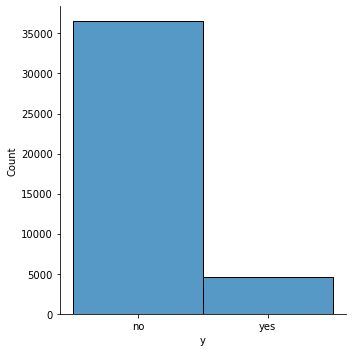

In [89]:
# check if dataset is balanced
sns.displot(x='y', data=bank_df)
print(bank_df['y'].value_counts())

### Data is clearly not balanced

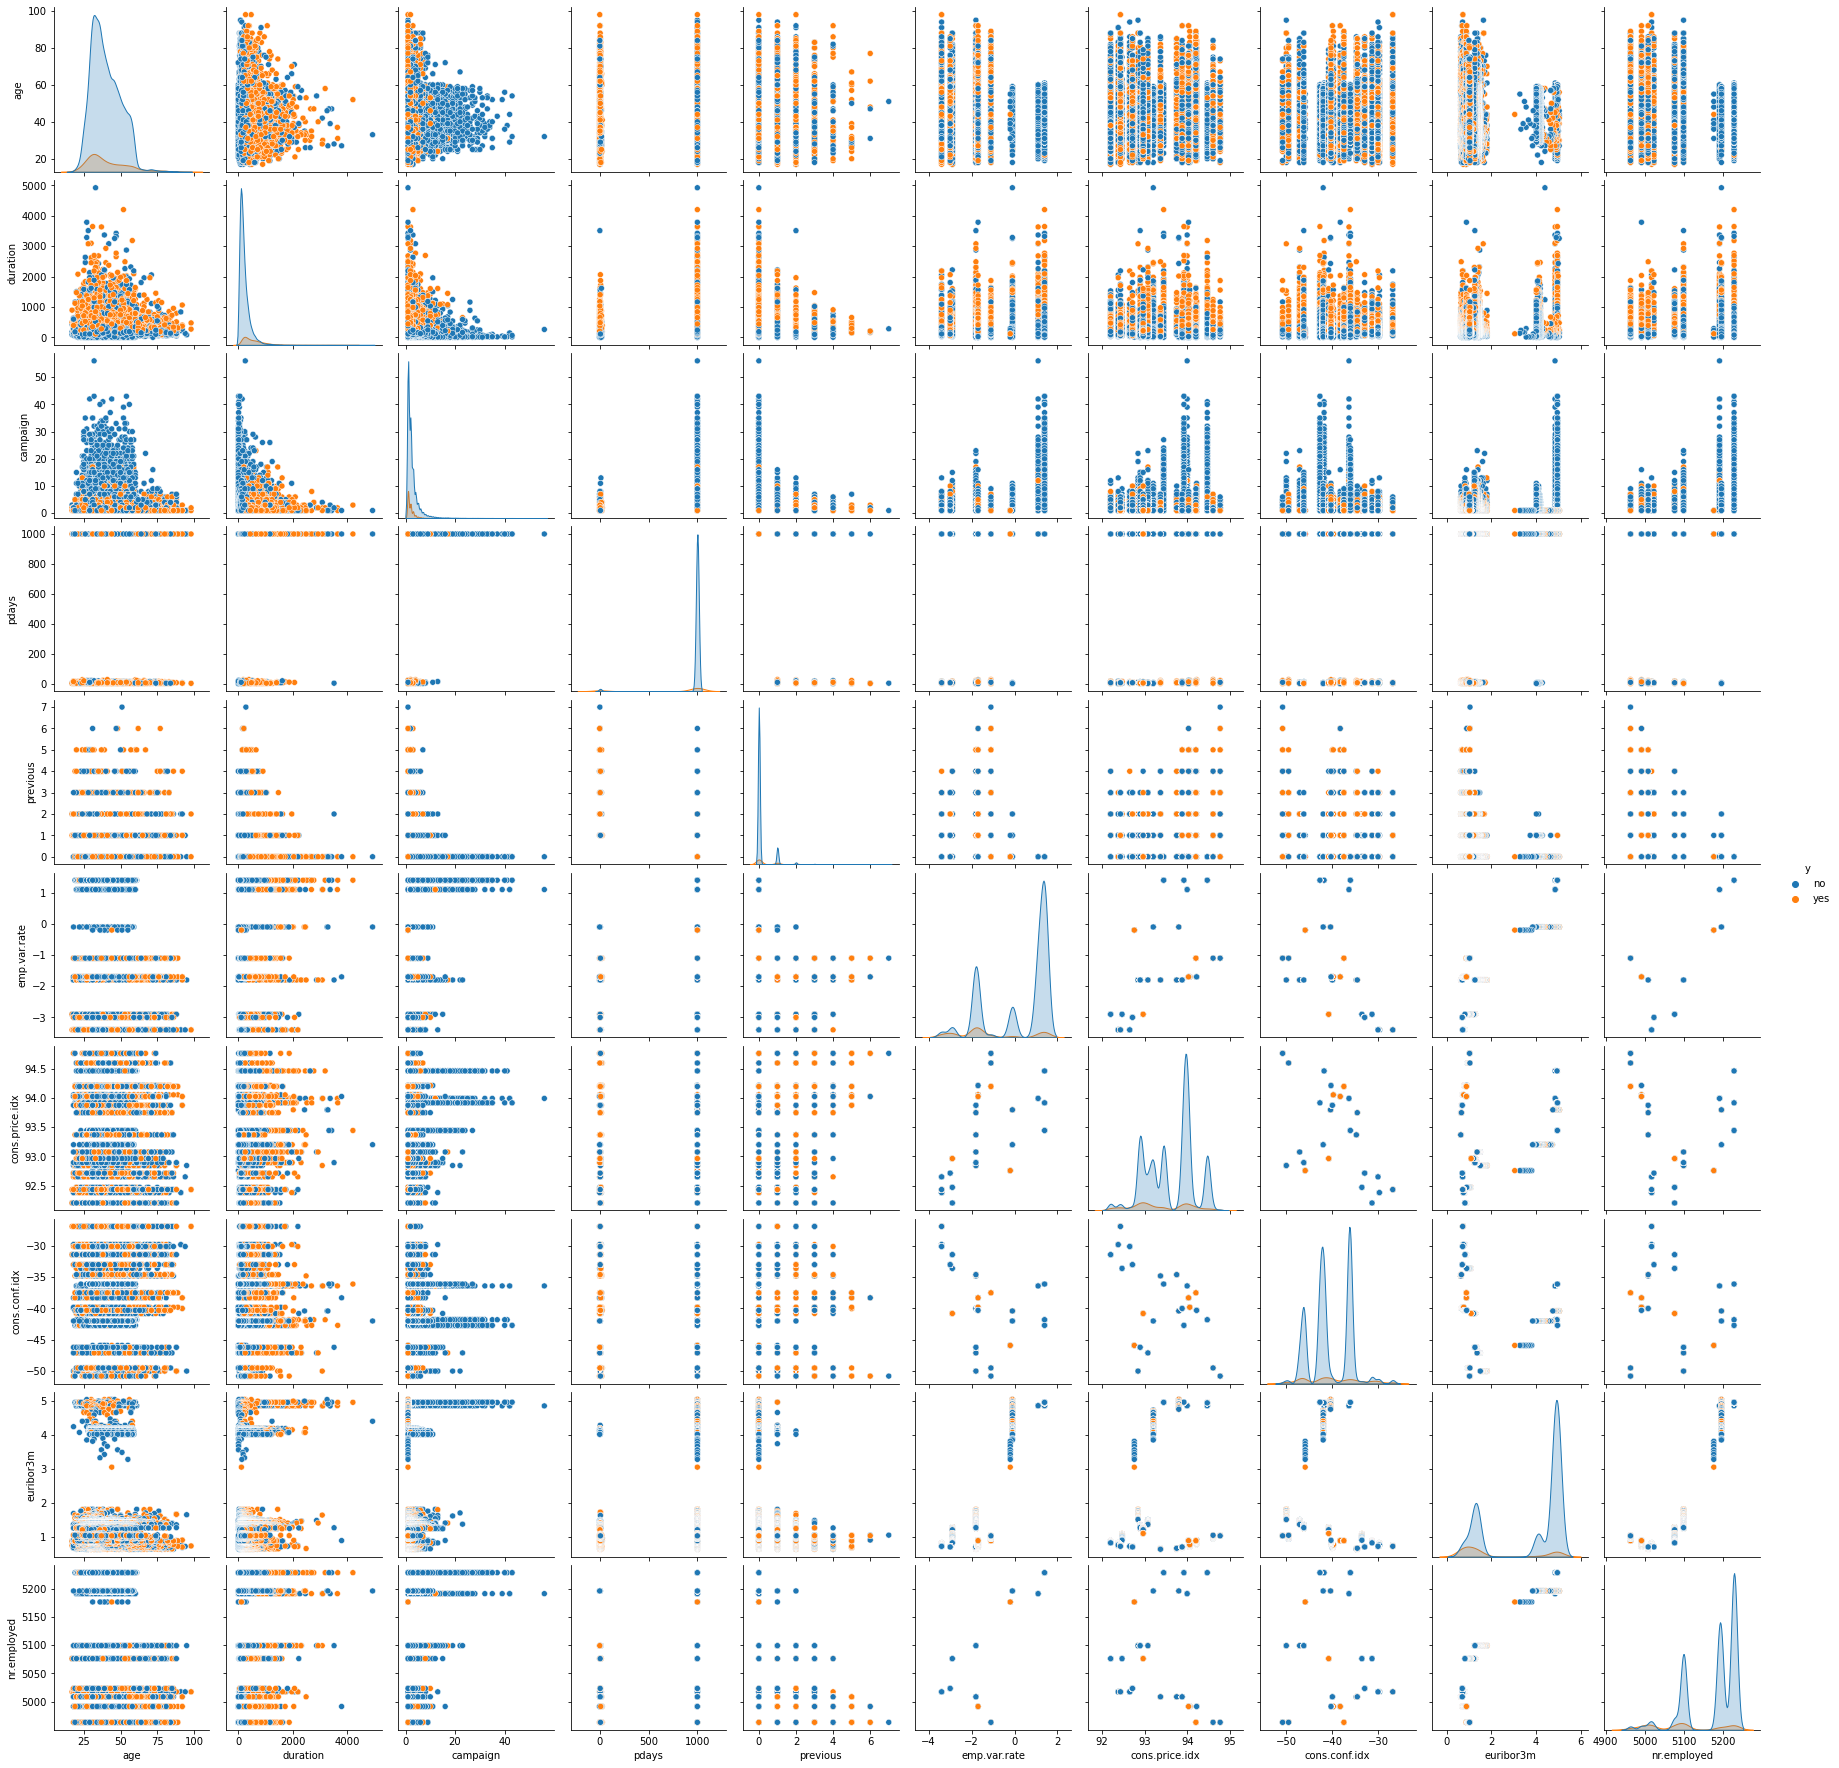

In [17]:
#checking pairplot
sns.pairplot(bank_df, hue='y')

<AxesSubplot:>

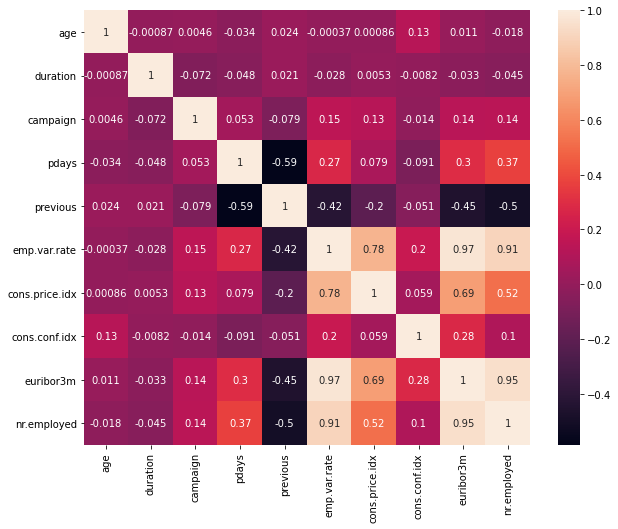

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(bank_df.corr(), annot=True)

In [97]:
# lets create a function to only keep one of higly correlated columns
def correlation(dataset, threshold):
    corr_cols = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                col = corr_matrix.columns[i]
                corr_cols.add(col)
    return corr_cols

In [99]:
cols = correlation(bank_df, 0.85)
cols_list= list(cols)
cols_list

['nr.employed', 'euribor3m']

In [100]:
corr_df = bank_df.drop(cols_list, axis=1)
corr_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,yes


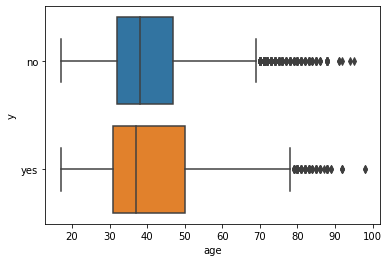

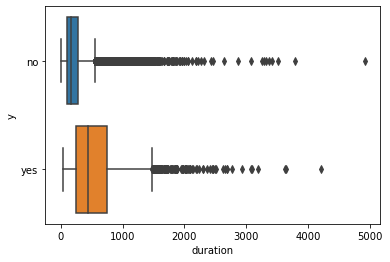

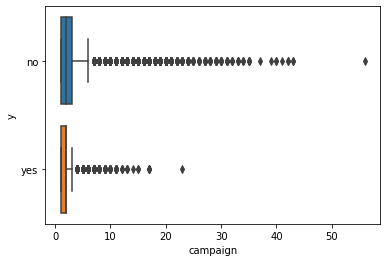

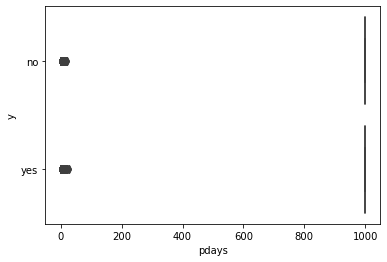

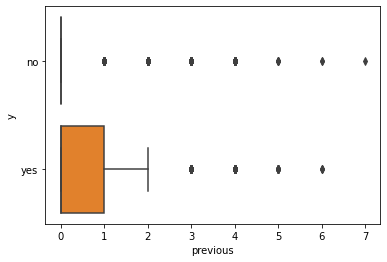

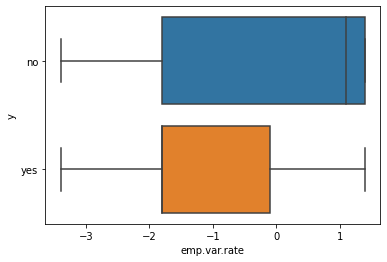

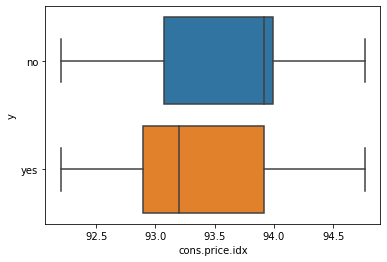

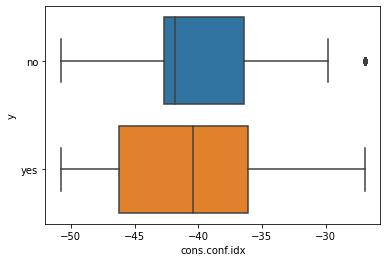

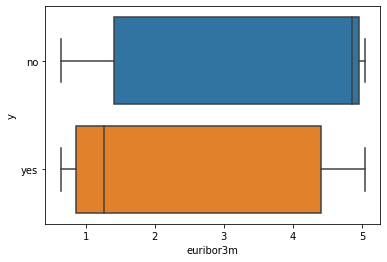

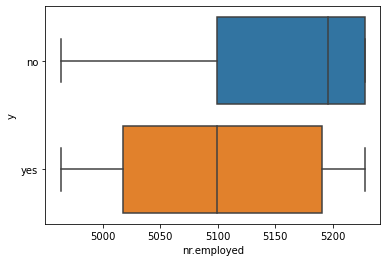

In [93]:
#Check outliers in each column
for f in num_features:
    data = bank_df.copy()
    sns.boxplot(x=f,y='y', data=data)
    plt.show()

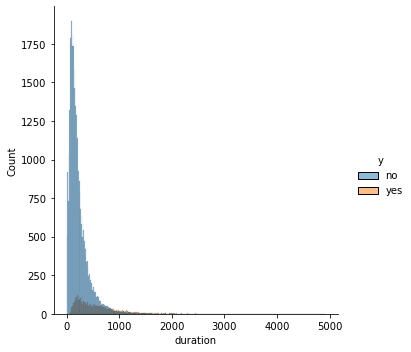

In [20]:
sns.displot(x='duration', data=bank_df, hue='y')

<AxesSubplot:xlabel='y', ylabel='duration'>

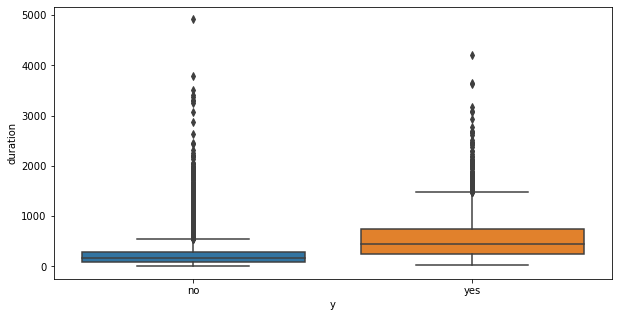

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='duration',data=bank_df)

In [24]:
temp_df = bank_df[bank_df['duration']==0]
temp_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [29]:
temp_df['y'].unique()

array(['no'], dtype=object)

<Figure size 3600x720 with 0 Axes>

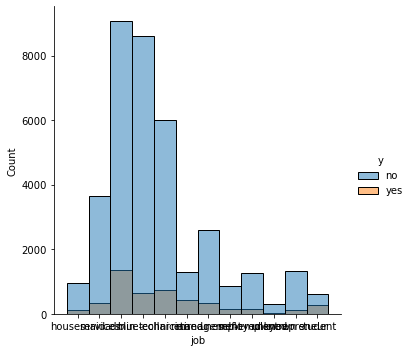

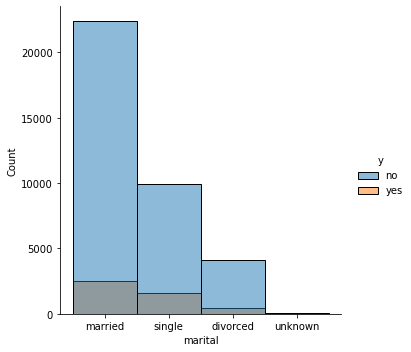

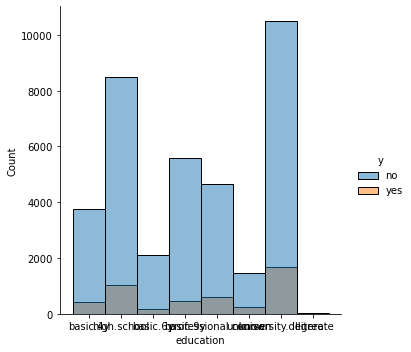

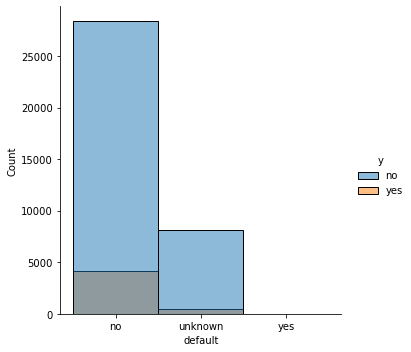

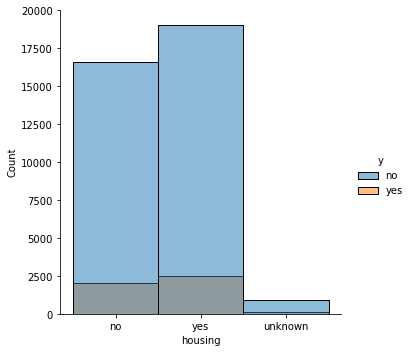

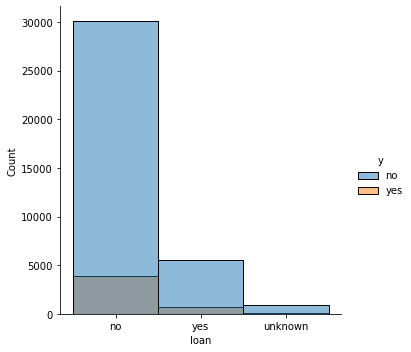

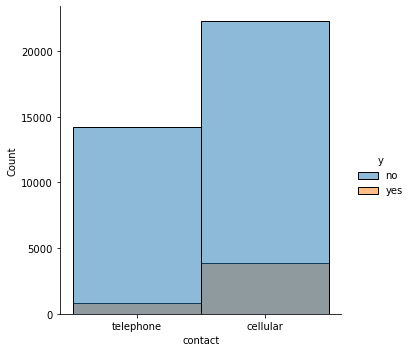

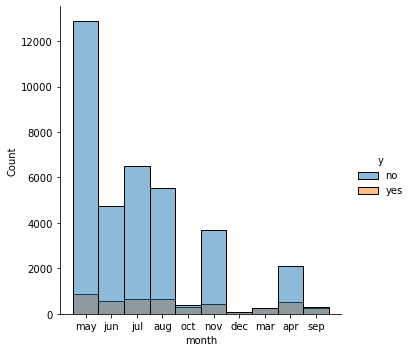

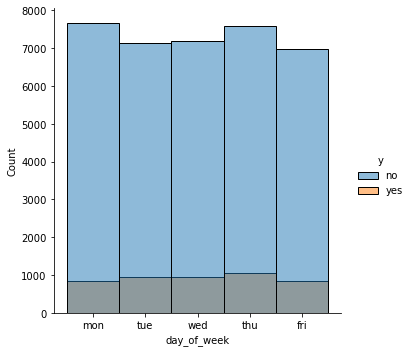

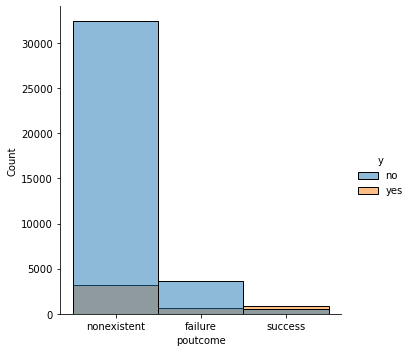

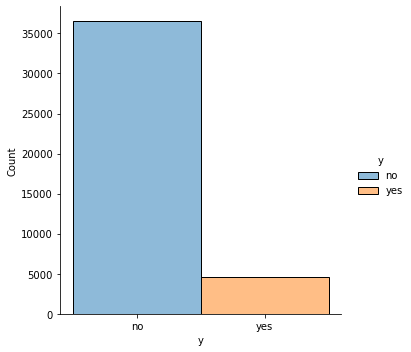

In [91]:
plt.figure(figsize=(50,10))
for f in cat_features:
    
    data=bank_df.copy()
    sns.displot(x=f, data=data,hue='y')
    plt.show()

In [ ]:
#lets upscale the data
from sklearn.utils import up

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
# lets convert categorical data into numerical data
temp_df=pd.get_dummies(bank_df[cat_features], drop_first=True)
temp_df

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
41184,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
41185,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
41186,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [101]:
new_df = corr_df.drop(cat_features, axis=1)
new_df=pd.concat([new_df, temp_df], axis=1)
new_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [102]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   job_blue-collar                41188 non-null  uint8  
 9   job_entrepreneur               41188 non-null  uint8  
 10  job_housemaid                  41188 non-null  uint8  
 11  job_management                 41188 non-null  uint8  
 12  job_retired                    41188 non-null 

In [103]:
X = new_df.drop('y_yes', axis=1)
y=new_df.y_yes

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score

In [107]:
lr = LogisticRegression()
lr_m = lr.fit(X_train_std, y_train)
lr_pred = lr_m.predict(X_test)

print(confusion_matrix(lr_pred, y_test))
print(accuracy_score(lr_pred, y_test))
print(cross_val_score(lr,X_train_std,y_train,cv=10,scoring='accuracy').mean())

[[3979   24]
 [6989 1365]]
0.43246742736910254
0.9108252956375867


In [108]:
alg = KNeighborsClassifier()
model = alg.fit(X_train_std, y_train)
pred = model.predict(X_test)

print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(cross_val_score(alg,X_train_std,y_train,cv=10,scoring='accuracy').mean())

[[  256     0]
 [10712  1389]]
0.13312292627660435
0.8918527375792765


For k 1 accuracy is 0.7950958970623938
For k 2 accuracy is 0.8459982196325969
For k 3 accuracy is 0.6550942785465728
For k 4 accuracy is 0.7555231852391358
For k 5 accuracy is 0.13312292627660435
For k 6 accuracy is 0.2798413854495428
For k 7 accuracy is 0.16136602735291738
For k 8 accuracy is 0.7088290038035122
For k 9 accuracy is 0.6333252407542284
For k 10 accuracy is 0.6967710609371207
For k 11 accuracy is 0.6732216557416849
For k 12 accuracy is 0.8054543983167436
For k 13 accuracy is 0.7836044347333495
For k 14 accuracy is 0.8085295783766286
For k 15 accuracy is 0.7617544711499555
For k 16 accuracy is 0.8287610261390305
For k 17 accuracy is 0.530711337703326
For k 18 accuracy is 0.8032694019584041
For k 19 accuracy is 0.13530792263494376
For k 20 accuracy is 0.1499554908149227
For k 21 accuracy is 0.13627903212753906
For k 22 accuracy is 0.1843489520110059
For k 23 accuracy is 0.14429068544145018
For k 24 accuracy is 0.39880229829246583
For k 25 accuracy is 0.13546977421704298
For

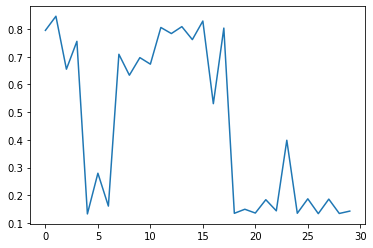

In [109]:
lst=[]
for k in range(1,31):
    alg = KNeighborsClassifier(n_neighbors=k)
    model = alg.fit(X_train_std, y_train)
    pred = model.predict(X_test)
    score = accuracy_score(pred, y_test)
    lst.append(score)
    #print(confusion_matrix(pred, y_test))
    print('For k {} accuracy is {}'.format(k, score))
    
    #print(cross_val_score(alg,X_train_std,y_train,cv=10,scoring='accuracy').mean())
    
plt.plot(lst)

In [110]:
alg = DecisionTreeClassifier()
model = alg.fit(X_train_std, y_train)
pred = model.predict(X_test)

print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(cross_val_score(alg,X_train_std,y_train,cv=10,scoring='accuracy').mean())

[[8402  745]
 [2566  644]]
0.7320547058347495
0.8863377453463631


In [115]:
alg = RandomForestClassifier()
model = alg.fit(X_train_std, y_train)
pred = model.predict(X_test)

print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(cross_val_score(alg,X_train_std,y_train,cv=10,scoring='accuracy').mean())

[[1492  179]
 [9476 1210]]
0.2186614874160395
0.9110683508423525


In [116]:
print(precision_score(pred, y_test))
print(recall_score(pred, y_test))
print(f1_score(pred, y_test))

0.871130309575234
0.11323226651693805
0.2004140786749482


In [113]:
alg = GradientBoostingClassifier()
model = alg.fit(X_train_std, y_train)
pred = model.predict(X_test)

print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(cross_val_score(alg,X_train_std,y_train,cv=10,scoring='accuracy').mean())

[[   37     1]
 [10931  1388]]
0.1153192522456907
0.9139123938069211


In [1]:
print(precision_score(pred, y_test))
print(recall_score(pred, y_test))
print(f1_score(pred, y_test))

NameError: name 'precision_score' is not defined

### As from above Random forest and Gradient boosting performed best so lets perform hyperparameter tuning on these two
